**project step: Analyzing Patterns and Trends in the data**

This step of the project comprises of discovering characteristics of the data, structuring the data to help draw meaningful insights, and using visualizations to analyze the data. Ultimately, I am drawing conclusions about what significant trends or patterns to find in the dataset. 

In [1]:
## Import relevant package
import pandas as pd
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
## loading data for analysis
df_1= pd.read_csv("/Users/theophilusjesus/Documents/NEW_DATA_ANALYTICS_PROJECT/new_data/Unicorn_Companies.csv")

**DATA EXPLORATION**

In [3]:
## Get size
df_1.size

10740

In [4]:
## view 5 sample
df_1.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
## Description of dataset
df_1.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [6]:

## Rows and dataset
df_1.shape

(1074, 10)

In [7]:
# Check for duplicates.
if len(df_1) != len(set(df_1)):
    print("yes there's duplicate!")
else:
    print("no duplicate.")

yes there's duplicate!


In [8]:
# Check for duplicates.
df_1 = df_1.drop_duplicates()
df_1.shape

(1074, 10)

The shape return is thesame as the shape of the original dataset, so we can infer there's no duplicate

**DISPLAY THE COLUMN TYPE**

In [9]:
df_1.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [10]:
## Sorting the company and displaying the rowms
df_1.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


These 10 rows correspond to unicorn companies that were founded in 2021.
These 10 companies were founded in different parts of the world and belong to different industries.

In [11]:
# Display each unique year that occurs in the dataset
df_1["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: count, dtype: int64

2015 prove the mostcoun t. TWe can deduce that 2015 is the year when the year where the most number of companies in this dataset were founded. We use histogram for graphiccal representation of the frequency distribution.

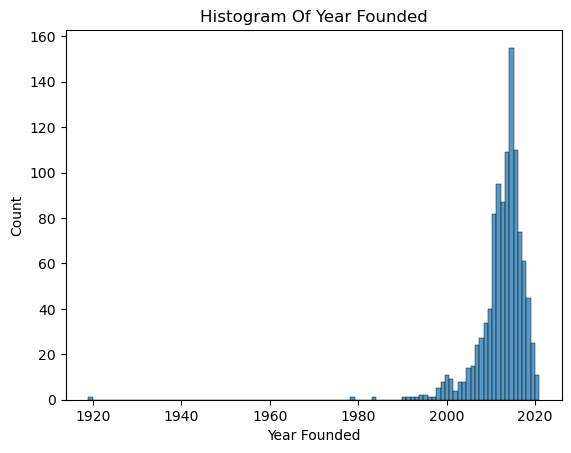

In [12]:
sns.histplot(data=df_1, x='Year Founded')
plt.title('Histogram Of Year Founded');

**Convert the Date Joined column to datetime**

To compare when one company joined unicorn status to when another company joined

In [13]:
## Convert date join to datetime
df_1["Date Joined"] = pd.to_datetime(df_1["Date Joined"])
df_1.dtypes

/var/folders/c9/dxkhc4b15vxf6dhsks__ktc80000gn/T/ipykernel_10481/1262543782.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1["Date Joined"] = pd.to_datetime(df_1["Date Joined"])


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

**Create a Month Joined column**

In [14]:
df_1["Month Joined"] = df_1["Date Joined"].dt.month_name()
df_1.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


**Create a Years To Join column¶**

We want to determine how many years it took for companies to reach unicorn status.

In [15]:
df_1["Years To Join"] = df_1["Date Joined"].dt.year - df_1["Year Founded"]
df_1.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


Gain insight on year 2021, as is the most recent year with ata available.

In [16]:
company_2021 = df_1[df_1["Date Joined"].dt.year == 2021]
company_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


*Using time interval to observev trend in company that become unicorn in one year.*

In [17]:
# Create a `Week Joined` column into `company_2021.`
company_2021.insert(3, "Week Joined", company_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Group `companies_2021` by `Week Joined`. 
# Aggregate by counting companies that joined per week of 2021.
company_by_week_2021 = company_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# Display and confirm that it was created.
company_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [18]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that i defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.

### YOUR CODE HERE ###

# Filter by the additional year to create a subset that consists of companies that joined in that year.
company_2020 = df_1[df_1["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
company_2020_2021 = pd.concat([company_2020, company_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `company_2021`.
company_2020_2021["Quarter Joined"] = company_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
company_2020_2021["Valuation"] =  company_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `company_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
company_by_quarter_2020_2021 = company_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the first few rows of the new DataFrame to confirm that it was created.


company_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


# Time-to-unicorn visualization

- box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.

In [19]:
# Defined list of months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


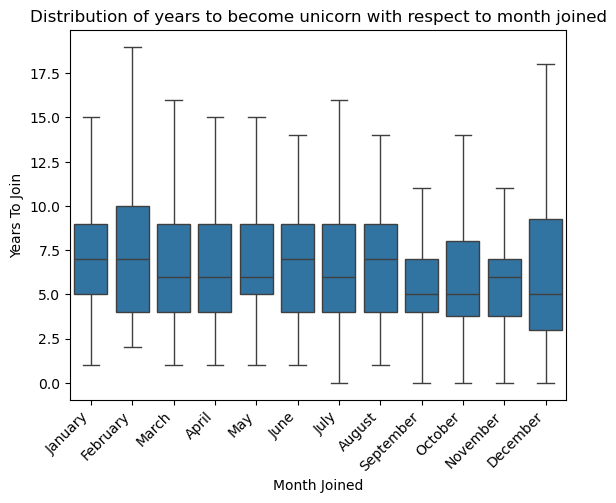

In [20]:
# distribution of how long it took companies to become unicorns, with respect to the month they joined.

sns.boxplot(x=df_1['Month Joined'], 
            y=df_1['Years To Join'], 
            order=month_order, 
            showfliers=False)

plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

- In the preceding box plot, the median value for Years To Join is different for each month. Also, the median Years To Join is lower for the months of September and October. This could indicate that companies that reached unicorn status in early fall took less time to reach $1 billion valuation. This is because the number of companies is relatively close/consistent for each month. If that were not the case, it would be misleading to compare the median values from the box plots between months.

# Result evaluation

- bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.

/var/folders/c9/dxkhc4b15vxf6dhsks__ktc80000gn/T/ipykernel_10481/2773263248.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=df_1["Year Founded"], y=df_1["Years To Join"], ci=False)


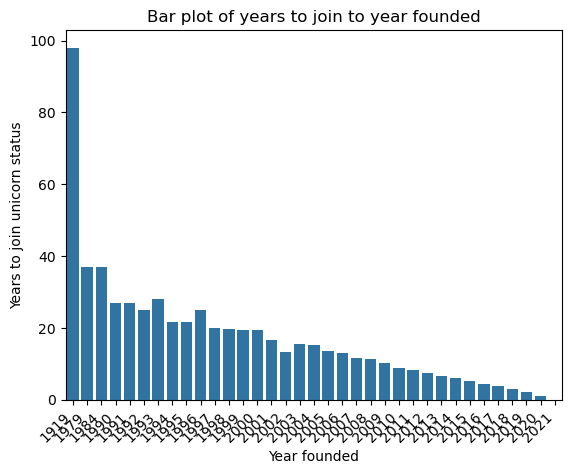

In [21]:
sns.barplot(x=df_1["Year Founded"], y=df_1["Years To Join"], ci=False)

plt.title("Bar plot of years to join to year founded")

plt.xlabel("Year founded")


plt.ylabel("Years to join unicorn status")

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

- There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average.

**A bar plot to visualize the number of companies that joined per interval of year for the subset of companies joined in the year of interest, grouped by the time interval.**

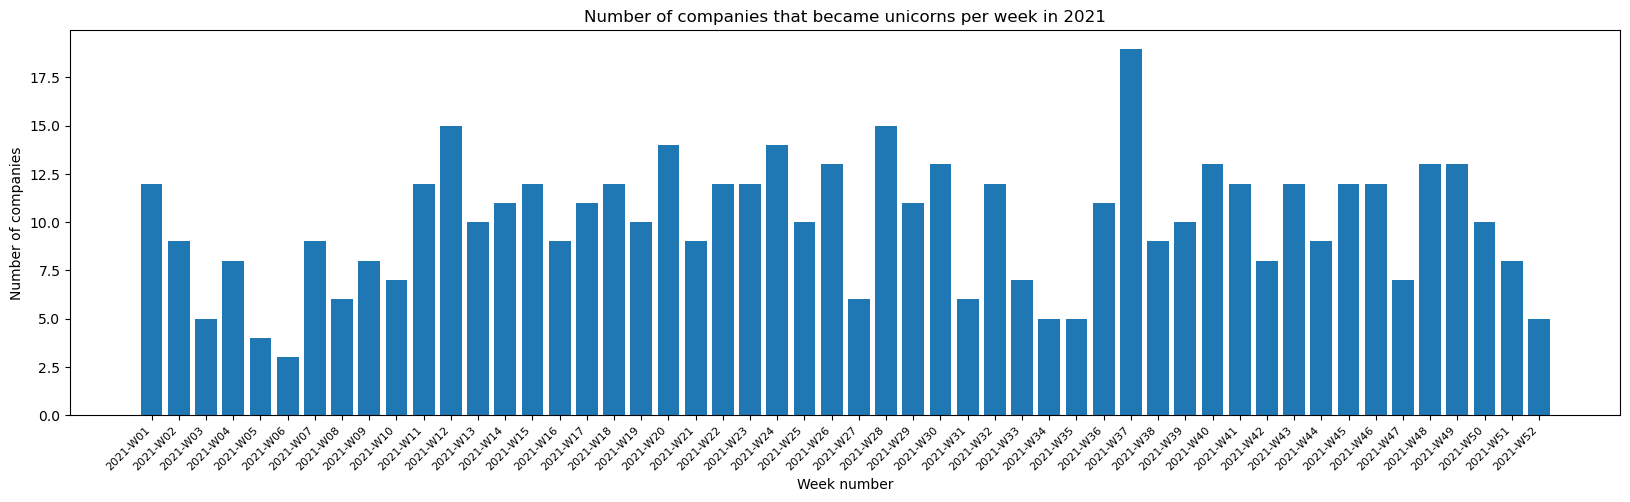

In [22]:

plt.figure(figsize = (20, 5))

plt.bar(x=company_by_week_2021['Week Joined'],height=company_by_week_2021['Company Count'])
plt.plot()

plt.xlabel("Week number")

plt.ylabel("Number of companies")

plt.title("Number of companies that became unicorns per week in 2021")

plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

plt.show()

**Observations from a bar plot of the number of companies that became unicorns per week in 2021:**
- The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
- The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021.
- The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July).

# Visualize the average valuation over the quarters
A bar plot  of the subset of companies that joined in the years of interest, to visualize the average valuation over the quarters, with two bars for each time interval. This help  compare quarterly values between the two years.

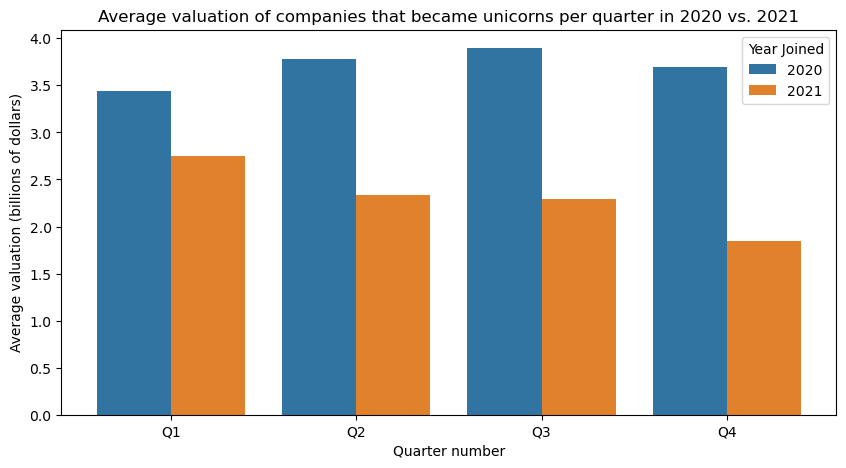

In [23]:
# I used slicing, to extract the year component and the time interval that i specified, 
# and save them by adding two new columns into the subset. 

### YOUR CODE HERE ###

company_by_quarter_2020_2021['Quarter Number'] = company_by_quarter_2020_2021['Quarter Joined'].str[-2:]
company_by_quarter_2020_2021['Year Joined'] = company_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.

### YOUR CODE HERE ###

plt.figure(figsize = (10, 5))

# Create a grouped bar plot.

### YOUR CODE HERE ###

sns.barplot(x=company_by_quarter_2020_2021['Quarter Number'],
            y=company_by_quarter_2020_2021['Average Valuation'],
            hue=company_by_quarter_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.

### YOUR CODE HERE ###

plt.xlabel("Quarter number")

# Set the y-axis label.

### YOUR CODE HERE ###

plt.ylabel("Average valuation (billions of dollars)")

# Set the title.

### YOUR CODE HERE ###

plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.

### YOUR CODE HERE ###

plt.show()

# Observe from the preceding grouped bar plot?
Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:
In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021.
In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3.
In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.

# Bias
Bias that could potentially inform the analysis.
* Potential bias:

If there were bias in terms of which cities and countries were taken into account when collecting the data, then the analysis would be more representative of the cities and countries that are in the dataset than those that are not.

If the dataset did not include certain industries, then the analysis would be more representative of the industries that are included and may not reflect trends in those that are excluded from the data.

If the dataset had time gaps, (e.g., if companies that joined in certain windows of time were not included in the data), then that may have affected the patterns observed, depending on how salient the gaps were.

Another point of bias pertains to the nature of time data; there have been fewer years to collect data on companies that were founded more recently than for companies that were founded longer ago.

# Potential next steps for the EDA.
* Potential next steps with EDA:

Analyze the data with respect to industries of unicorn companies at different datetime intervals.

Analyze the data with respect to cities or countries where unicorn companies were founded at different datetime intervals.
Clean the data as needed.

# Possible questions:
How many rounds of funding did each company require and when did this funding take place?

Have any of these unicorn companies acquired other companies along the way? If so, which companies acquired other companies, which companies did they acquire, and when did the acquisitions take place?

# Findings to  share with others.
There are 1074 unicorn companies represented in this dataset.

2015 is the year when the most number of unicorn companies were founded.

Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries.

The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.

One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.

# Possible recommendations to share with stakeholders based on these findings.
According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.

Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.

It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year.

The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders.